In [6]:
pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.2 MB/s eta 0:00:00


In [7]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=efec7ef24b0eb7384a7407ad3f6234f564177b6a3219482e76c301fdaf0ab37d
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import os
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
import re
import demoji
from autocorrect import Speller
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
df=pd.read_csv('/content/drive/MyDrive/Cyberbullying Tweets/cyberbullying_tweets.csv')

In [4]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [6]:
df['tweet_text'].values[0]

'In other words #katandandre, your food was crapilicious! #mkr'

In [7]:
# import seaborn as sns
# sns.countplot(data=df,x='cyberbullying_type')

In [8]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [73]:
# Stop words are a set of commonly used words in a language.
stp_words=set(stopwords.words('english'))
stp_words.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm',
                  'im', 'll', 'y', 've', 'u', 'ur', 'don',
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat',
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like'])

CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
# spell=Speller(lang='en')
stemmer=SnowballStemmer('english')
def clean_text(text):
    #removing hastags and links
    pattern=re.compile(r"(#[a-zA-Z0-9]+|@[a-zA-Z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text=pattern.sub('',text)
    text=" ".join(text.split())

    #make all lowercase
    text=text.lower()

    #stemming
    text=" ".join([stemmer.stem(word) for word in text.split()])

    #remove shortands
    s=''
    for word in text.split():
        if word in CONTRACTION_MAP.keys():
            s=s+' '+CONTRACTION_MAP[word];
        else:
            s=s+' '+word
    text=s

    #remove puncutations
    punc=re.compile(r"[^\w\s]")
    text=punc.sub('',text)

    #remove stop words
    text=" ".join(word for word in text.split() if word not in stp_words)

    #remove emojis
#     emoji=demoji.findall(text)
#     for emoj in emoji:
#         text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    #applying autocorrect to words
#     correct_spell=''
#     for word in text.split():
#         correct_spell=correct_spell+' '+spell(word)
#     text=" ".join(correct_spell.split())
    return text

In [74]:
line1=clean_text(df['tweet_text'].values[0])
line1

'word food crapilicious'

In [75]:
#cleaning of data
df['clean_data']=df['tweet_text'].apply(lambda x: clean_text(x))

In [12]:
df.sample(10)

,tweet_text,cyberbullying_type,clean_data
1488,RT @PeterTownsend7: #IslamicState #ISIS #Rothe...,not_cyberbullying,petertownsend7 prophet rape
11727,idk i never made rape jokes or said slurs and ...,gender,idk never made rape joke said slur ever never ...
13562,@nethercott_eden: Why is #WomenAgainstFeminism...,gender,_eden whi thing learn someth mean befor et tu
12209,RT @youngthug: Horse face hoe stop playing bef...,gender,youngthug hors face hoe stop play befor show w...
8578,@semzyxx @owais00 I know it's hard for a Jihad...,gender,know hard jihadi bitch understand read compreh...
13121,"@KeenGaze I keep screengrabs not links, sorry....",gender,keep screengrab links sorry googl kate millett...
6689,@juliaferraioli i have those. :P,not_cyberbullying,
34720,"If you mean Mr. Trump, Pastor, then I guess I ...",age,mean mr trump pastor guess agree wish polit ne...
17865,@SAIACarleton @Naazzk What about the environme...,religion,environment racism experi christians jews ezid...
14196,"@jongraywb You forgot racist jokes, sexist jok...",gender,forgot racist jokes sexist jokes rape jokes ga...


In [76]:
# Encoding the cyberbullying_type column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df.cyberbullying_type=encoder.fit_transform(df['cyberbullying_type'])
df

,tweet_text,cyberbullying_type,clean_data
0,"In other words #katandandre, your food was cra...",3,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,3,whi white
2,@XochitlSuckkks a classy whore? Or more red ve...,3,classi whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3,_gio meh thank head concern anoth angri dude t...
4,@RudhoeEnglish This is an ISIS account pretend...,3,isi account pretend kurdish account islam lies
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1,black ppl expect anything depend anything yet ...
47688,Turner did not withhold his disappointment. Tu...,1,turner withhold disappointment turner call cou...
47689,I swear to God. This dumb nigger bitch. I have...,1,swear god dumb nigger bitch got bleach hair re...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1,yea fuck therealexel nigger fuck unfollow fuck...


In [77]:
df.clean_data.duplicated().sum()

2970

In [78]:
df.drop_duplicates('clean_data',inplace=True)

In [79]:
# check if there is only spaces in cleaned data
df['clean_data'].str.isspace().sum()

0

In [80]:
# removing unidentified cyberbullying type
df=df[df['cyberbullying_type']!='other_cyberbullying']

In [81]:
df.sample(5)

,tweet_text,cyberbullying_type,clean_data
2101,"Talking to my dad about school, really helped.",3,talk dad school realli helped
24024,@bkerensa you are not helping my anxiety.,4,help anxiety
14525,@Sparky15756 rape jokes gay jokes innernet mem...,2,rape joke gay joke innernet meme errywher
36708,this girl who is a trump supporter and also bu...,0,girl trump support also bulli middl high schoo...
47632,FYI I'm black. There is a thing for white cult...,1,fyi black thing white cultur call magic negro ...


In [82]:
import matplotlib.pyplot as plt

In [83]:
#Top words used for each cyberbullying type
for bully in df['cyberbullying_type'].unique():
    top_50_words=df.clean_data[df['cyberbullying_type']==bully].str.split(expand=True).stack().value_counts()[:51]
top_50_words

fuck         5820
nigger       5119
dumb         5009
ass          2235
black        2113
white        1542
call         1362
obama        1078
one          1020
peopl        1018
bitch         982
say           799
first         747
get           738
past          669
racism        660
shit          641
_             606
negro         603
anyth         603
go            548
racist        528
color         517
nigga         445
know          437
would         428
whi           401
think         375
tayyoung_     374
said          374
look          361
man           360
becaus        349
mad           343
hate          328
see           327
disgust       321
stupid        319
niggers       315
us            308
word          297
still         297
want          297
make          295
lol           288
even          273
use           266
cannot        261
person        256
time          249
got           244
dtype: int64

In [21]:
from wordcloud import WordCloud, STOPWORDS

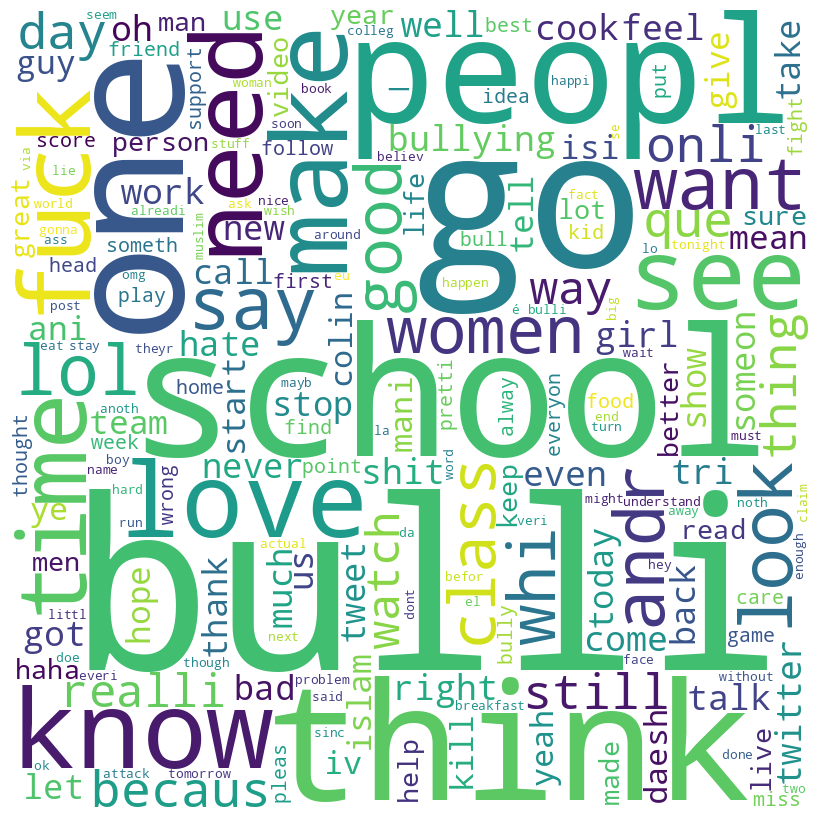

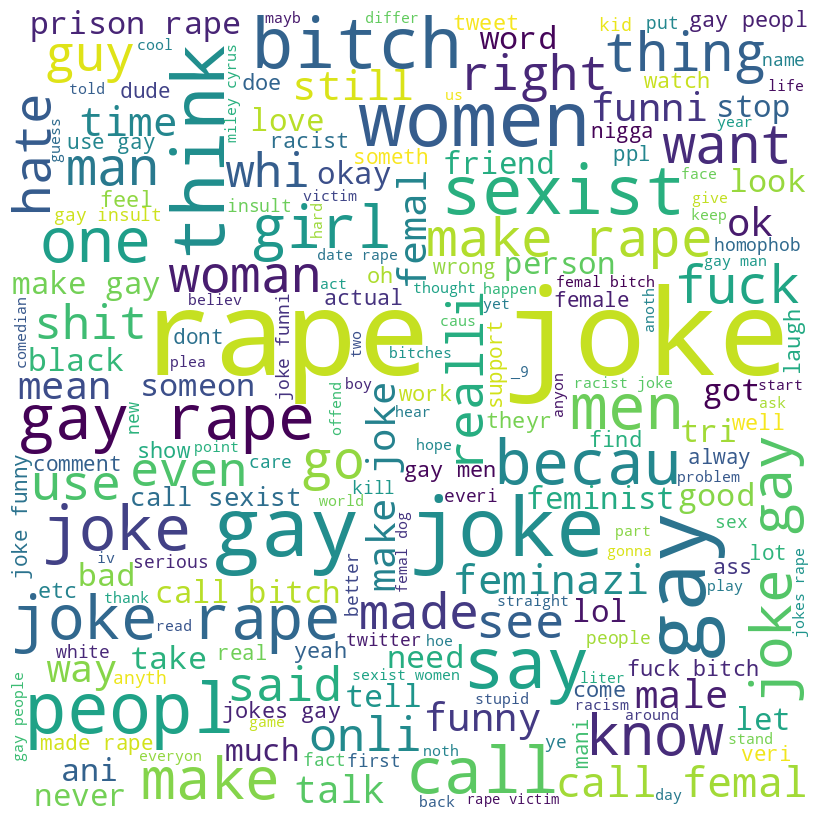

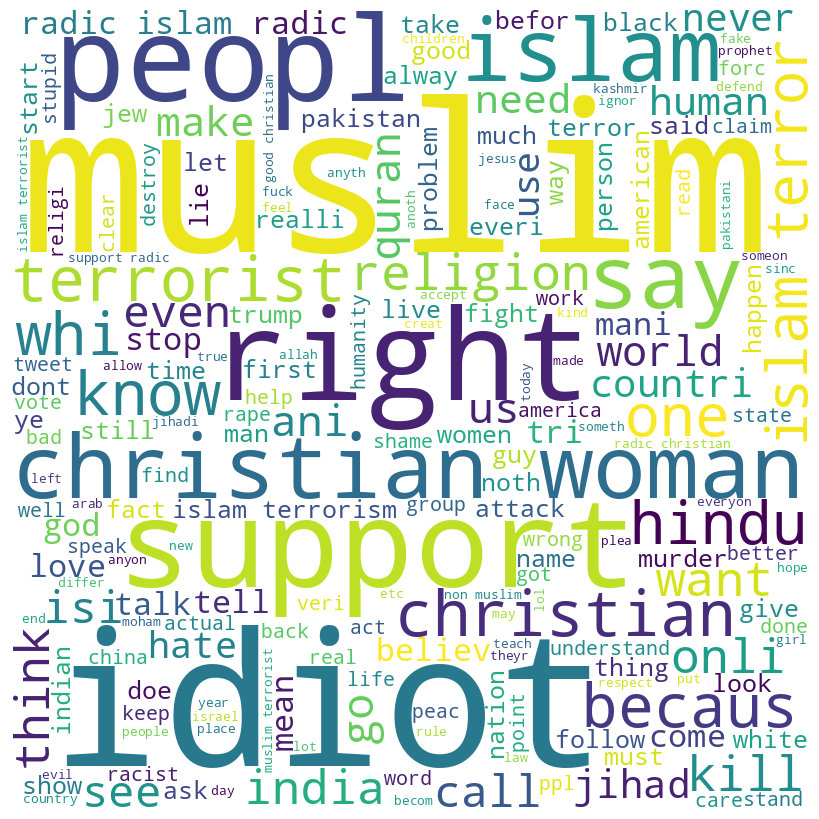

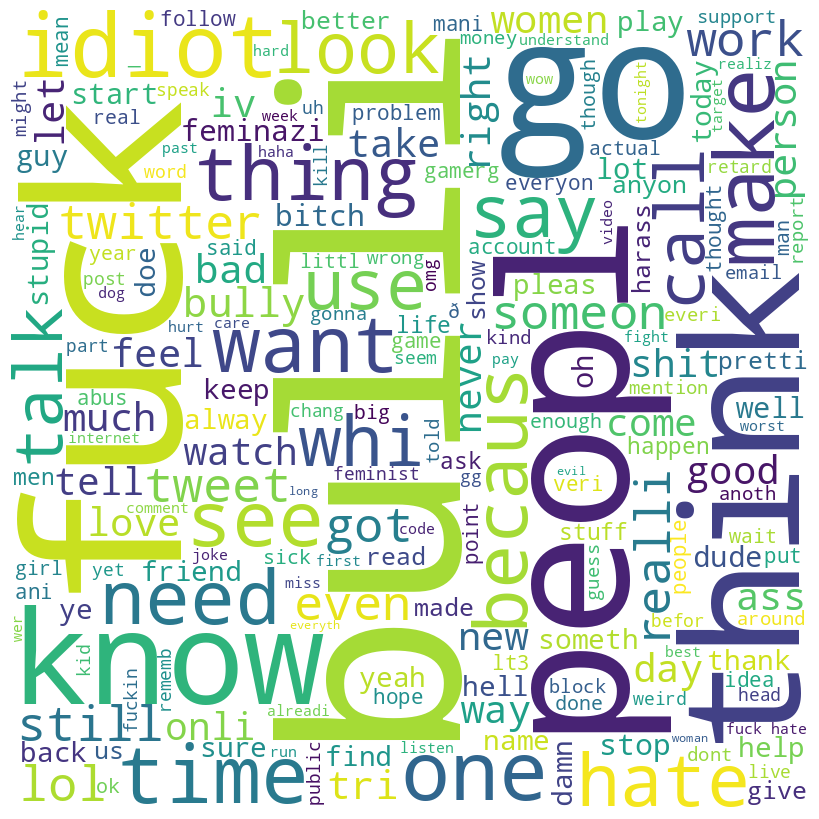

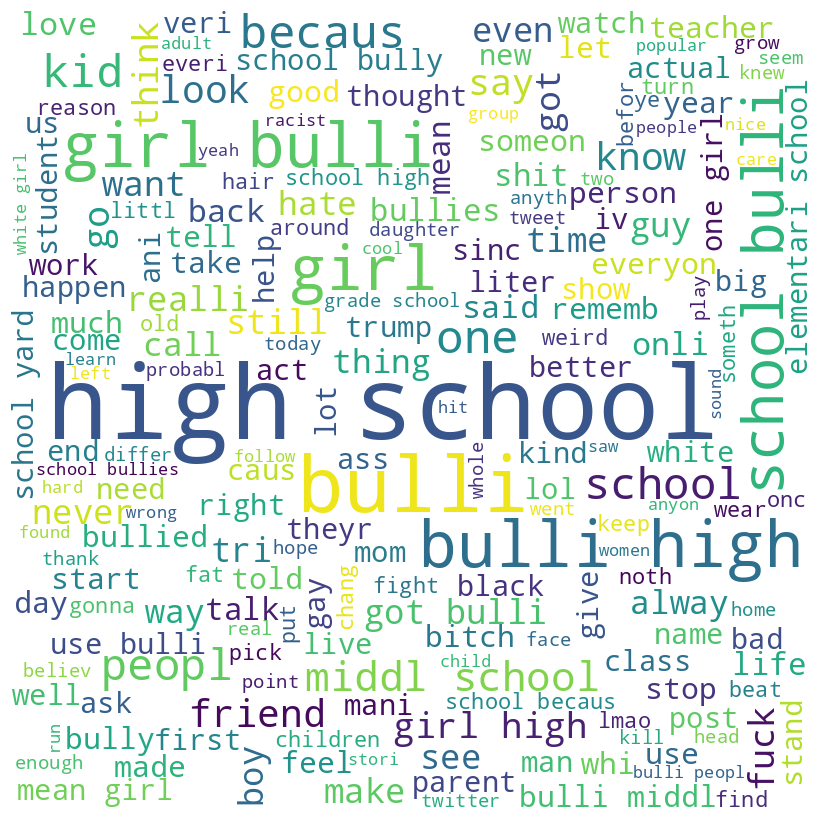

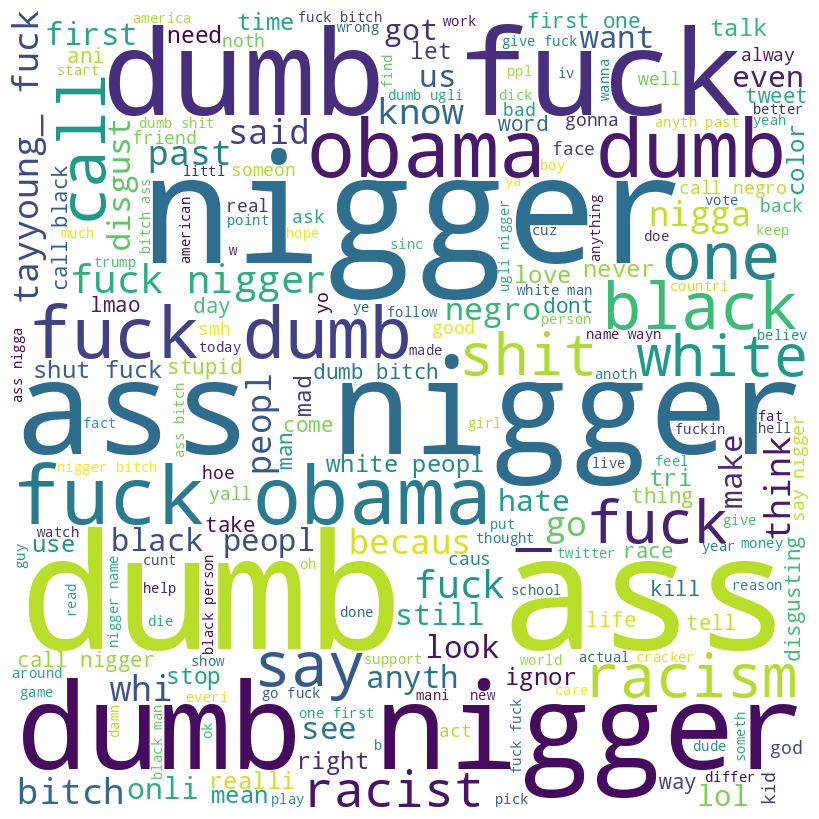

In [22]:
'''Word cloud is an image composed of words used in a particular text or subject, in which
the size of each word indicates its frequency or importance'''
for bully in df.cyberbullying_type.unique():
    s=''
    for phrases in df.clean_data[df.cyberbullying_type==bully]:
        s=s+' '+phrases.strip()

    wordcloud=WordCloud(width=800,height=800,background_color='white',stopwords=STOPWORDS,min_font_size=10).generate(s)

    #plotting the word cloud image
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    print()

In [23]:
df.columns

Index(['tweet_text', 'cyberbullying_type', 'clean_data'], dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
df= df.sample(10000)
x=df['clean_data']
y=df['cyberbullying_type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [96]:
tfidf=TfidfVectorizer(max_features=100)

In [97]:
x_train_tfidf=tfidf.fit_transform(x_train)
x_test_tfidf=tfidf.transform(x_test)

In [98]:
print(x_train_tfidf)

  (0, 34)	0.4169845117308271
  (0, 11)	0.4467658136593436
  (0, 16)	0.4539396813378462
  (0, 69)	0.41641282171098537
  (0, 83)	0.49705467741838816
  (1, 28)	0.5378208518864365
  (1, 43)	0.4910294432029541
  (1, 72)	0.3129784885310687
  (1, 32)	0.36972771594926757
  (1, 9)	0.3071321376094192
  (1, 25)	0.37503939660675517
  (2, 30)	1.0
  (3, 18)	0.18592239878508415
  (3, 6)	0.1476355081552987
  (3, 8)	0.14649133690352345
  (3, 88)	0.1726473413806145
  (3, 79)	0.1782900048004411
  (3, 29)	0.4886178839584824
  (3, 92)	0.17650596267006108
  (3, 24)	0.26752110290130154
  (3, 27)	0.2931562333364063
  (3, 40)	0.3599013272270781
  (3, 70)	0.3373526282075786
  (3, 72)	0.2043190144225675
  (3, 32)	0.12068305857378822
  :	:
  (7992, 85)	0.5707083382258203
  (7992, 46)	0.48967028456325834
  (7993, 60)	0.42415028534112376
  (7993, 53)	0.34912023923143215
  (7993, 33)	0.3660932100120388
  (7993, 82)	0.4608937939419087
  (7993, 93)	0.4042816013253636
  (7993, 87)	0.4339592758805199
  (7994, 98)	1.0
  

In [99]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_tfidf=x_train_tfidf.toarray()
scaled_x_train=scale.fit_transform(x_train_tfidf)
x_test_tfidf=x_test_tfidf.toarray()
scaled_x_test=scale.transform(x_test_tfidf)

In [100]:
# Reducing the number of features to check how the cumulative explained varience changes.
from sklearn.decomposition import PCA
pca=PCA(100)
reduced_train=pca.fit_transform(scaled_x_train)

In [101]:
pca.explained_variance_ratio_.size

100

In [102]:
# varience explained
varience_explained=np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative explained variance')

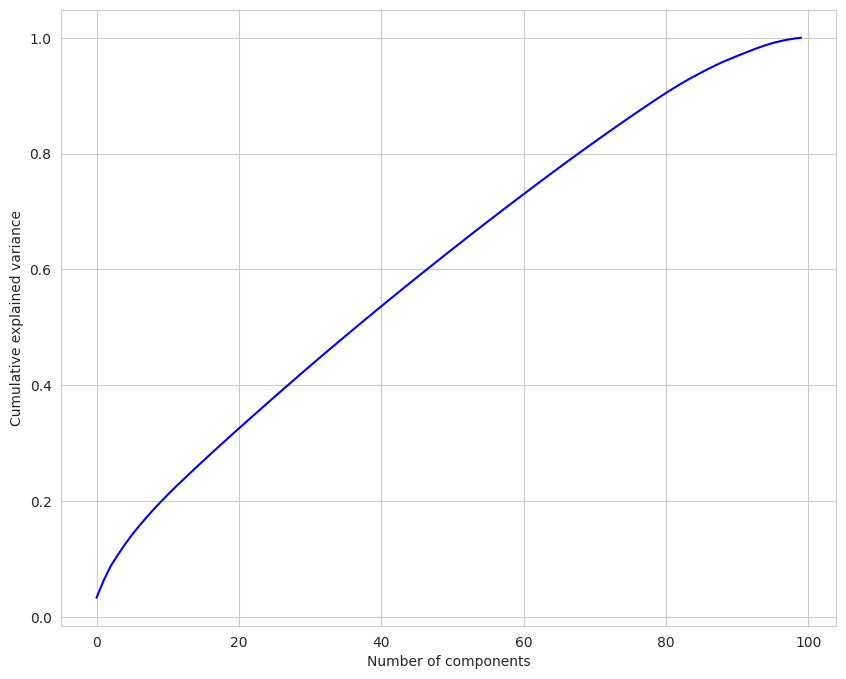

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.plot(varience_explained,color='b')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [104]:
final_pca=PCA(0.9)
final_reduced_x_train=final_pca.fit_transform(x_train_tfidf)

In [105]:
final_reduced_x_test=final_pca.transform(x_test_tfidf)

# Training models to check which one  works the best

In [106]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(final_reduced_x_train,y_train)
logistic_predict=logistic_model.predict(final_reduced_x_test)
print(classification_report(y_test,logistic_predict))
print(confusion_matrix(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       354
           1       0.94      0.94      0.94       322
           2       0.89      0.75      0.81       360
           3       0.51      0.70      0.59       373
           4       0.43      0.31      0.36       243
           5       0.92      0.87      0.89       348

    accuracy                           0.77      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.78      0.77      0.77      2000

[[334   1   1  17   1   0]
 [  0 303   1  12   5   1]
 [  4   3 270  63  16   4]
 [ 13   8  12 260  65  15]
 [  3   5  18 134  76   7]
 [  0   2   3  28  13 302]]


In [107]:
# LOGISTIC REGRESSION with the complete data
log_model = LogisticRegression(solver = 'saga')
param_grid = {'C': np.logspace(0, 10, 5)}
grid_log_model = HalvingGridSearchCV(log_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_log_model.fit(x_train_tfidf, y_train)
preds_grid_log_model = grid_log_model.predict(x_test_tfidf)
print(classification_report(y_test, preds_grid_log_model))
print(confusion_matrix(y_test,preds_grid_log_model))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       354
           1       0.94      0.97      0.95       322
           2       0.89      0.76      0.82       360
           3       0.51      0.68      0.59       373
           4       0.44      0.33      0.38       243
           5       0.92      0.86      0.89       348

    accuracy                           0.78      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.79      0.78      0.78      2000

[[335   1   1  15   2   0]
 [  1 311   0   7   2   1]
 [  5   2 273  59  17   4]
 [ 12   9  15 254  68  15]
 [  3   6  17 130  81   6]
 [  0   2   2  30  14 300]]


In [108]:
# GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
grad_model = GradientBoostingClassifier(random_state = 42,n_iter_no_change=10)
param_grid = {'n_estimators': [64, 100, 128, 200]}
grid_grad_model = HalvingGridSearchCV(grad_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_grad_model.fit(x_train_tfidf, y_train)
preds_grid_grad_model = grid_grad_model.predict(x_test_tfidf)
print(classification_report(y_test, preds_grid_grad_model))
print(confusion_matrix(y_test,preds_grid_grad_model))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       354
           1       0.96      0.97      0.97       322
           2       0.93      0.75      0.83       360
           3       0.51      0.78      0.62       373
           4       0.44      0.26      0.32       243
           5       0.94      0.88      0.91       348

    accuracy                           0.79      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       0.80      0.79      0.79      2000

[[338   1   0   8   7   0]
 [  0 312   0   9   1   0]
 [  1   2 270  68  18   1]
 [ 10   3   9 290  48  13]
 [  1   3   9 162  62   6]
 [  0   3   2  32   6 305]]


In [112]:
# RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
n_estimators = [64, 100, 128]
bootstrap = [True, False] # Bootstrapping is true by default
param_grid = {'n_estimators': n_estimators, 'bootstrap': bootstrap}
grid_rf_model = HalvingGridSearchCV(rf_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_rf_model.fit(x_train_tfidf, y_train)
preds_grid_rf_model = grid_rf_model.predict(x_test_tfidf)
print(classification_report(y_test, preds_grid_rf_model))
print(confusion_matrix(y_test, preds_grid_rf_model))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       354
           1       0.97      0.97      0.97       322
           2       0.87      0.75      0.81       360
           3       0.52      0.72      0.61       373
           4       0.44      0.32      0.37       243
           5       0.94      0.89      0.91       348

    accuracy                           0.79      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.80      0.79      0.79      2000

[[335   2   0  14   3   0]
 [  1 311   0   7   2   1]
 [  2   2 270  64  19   3]
 [  6   3  16 270  66  12]
 [  2   3  21 135  77   5]
 [  0   1   3  28   8 308]]


In [113]:
# NEURAL NETWORKS
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation = 'logistic', max_iter = 10)  # Sigmoid Activation Function
param_grid = {'learning_rate_init': [0.001, 0.0015, 0.002, 0.0025]}
grid_nn_model = HalvingGridSearchCV(nn_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_nn_model.fit(x_train_tfidf, y_train)
preds_grid_nn_model = grid_nn_model.predict(x_test_tfidf)
print(classification_report(y_test, preds_grid_nn_model))
print(confusion_matrix(y_test, preds_grid_nn_model))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       354
           1       0.89      0.97      0.93       322
           2       0.88      0.74      0.81       360
           3       0.50      0.83      0.62       373
           4       0.71      0.02      0.04       243
           5       0.87      0.88      0.88       348

    accuracy                           0.77      2000
   macro avg       0.79      0.73      0.70      2000
weighted avg       0.80      0.77      0.73      2000

[[336   0   3  15   0   0]
 [  1 312   0   4   1   4]
 [  8   3 268  75   1   5]
 [ 16  13  18 309   0  17]
 [  6  21  13 180   5  18]
 [  0   3   3  35   0 307]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
